# Titanic Survival Prediction using Machine Learning

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
warnings.filterwarnings('ignore') 

## Loading the Data

In [2]:
train_data = pd.read_csv(r"D:\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r"D:\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualization

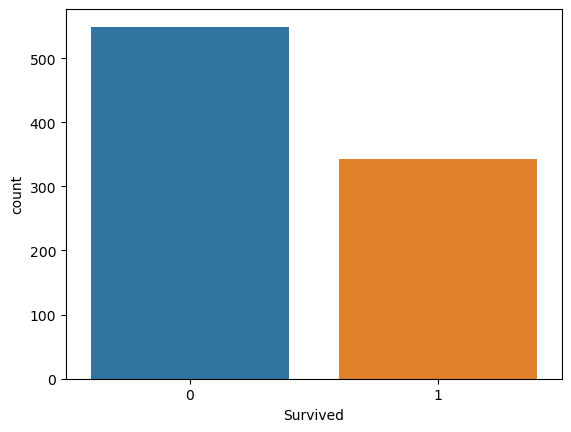

In [6]:
sns.countplot(x=train_data['Survived'])
plt.show()

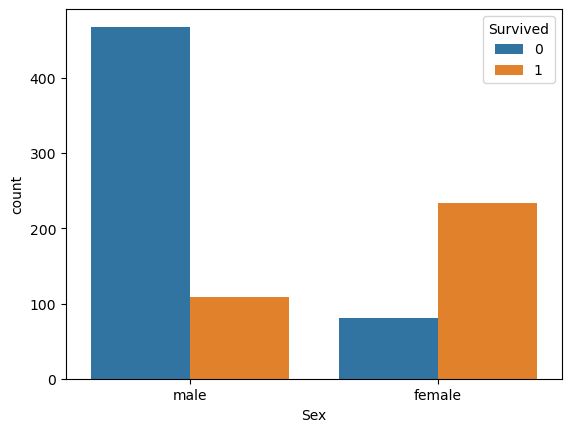

In [7]:
sns.countplot('Sex', hue='Survived', data=train_data) 
plt.show()

## Feature Engineering

In [8]:
train_data = train_data.drop(['Cabin'], axis=1) 
test_data = test_data.drop(['Cabin'], axis=1)

In [9]:
train_data = train_data.drop(['Ticket'], axis=1) 
test_data = test_data.drop(['Ticket'], axis=1) 

In [10]:
train_data = train_data.fillna({"Embarked": "S"}) 

In [11]:
train_data["Age"] = train_data["Age"].fillna(-0.5) 
test_data["Age"] = test_data["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels=labels) 
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels=labels) 

In [12]:
combine = [train_data, test_data] 

In [13]:
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
  
    pd.crosstab(train_data['Title'], train_data['Sex'])

In [14]:
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Rare') 
  
    dataset['Title'] = dataset['Title'].replace( 
        ['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
  
    train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
  

In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Rare": 6} 

In [16]:
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0) 

In [17]:
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode()  # Young Adult 
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode()  # Student 
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode()  # Adult 
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode()  # Baby 
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode()  # Adult 
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode()  # Adult 
  

In [18]:
age_title_mapping = {1: "Young Adult", 2: "Student", 
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 
  

In [19]:
for x in range(len(train_data["AgeGroup"])): 
    if train_data["AgeGroup"][x] == "Unknown": 
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]] 
  
    for x in range(len(test_data["AgeGroup"])): 
        if test_data["AgeGroup"][x] == "Unknown": 
            test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]] 

In [20]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping) 
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping) 
  
train_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,1


In [21]:
train_data = train_data.drop(['Age'], axis=1) 
test_data = test_data.drop(['Age'], axis=1) 

In [22]:
train_data = train_data.drop(['Name'], axis=1) 
test_data = test_data.drop(['Name'], axis=1) 

In [23]:
sex_mapping = {"male": 0, "female": 1} 
train_data['Sex'] = train_data['Sex'].map(sex_mapping) 
test_data['Sex'] = test_data['Sex'].map(sex_mapping) 
  

In [24]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping) 
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping) 

In [25]:
for x in range(len(test_data["Fare"])): 
    if pd.isnull(test_data["Fare"][x]): 
        pclass = test_data["Pclass"][x]  # Pclass = 3 
        test_data["Fare"][x] = round( 
            train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4) 
  

In [26]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4,  
                            labels=[1, 2, 3, 4]) 
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4,  
                           labels=[1, 2, 3, 4]) 
  

In [27]:
train_data = train_data.drop(['Fare'], axis=1) 
test_data = test_data.drop(['Fare'], axis=1) 

## Model Training

#### We will be using Random Forest Classifier

In [28]:
from sklearn.model_selection import train_test_split 
  
predictors = train_data.drop(['Survived', 'PassengerId'], axis=1) 
target = train_data["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 

In [29]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
  
randomforest = RandomForestClassifier() 
   
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 
  
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 

83.8


## Prediction

In [30]:
ids = test_data['PassengerId'] 
predictions = randomforest.predict(test_data.drop('PassengerId', axis=1)) 
  

In [31]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile.csv', index=False) 

In [32]:
result = pd.read_csv('resultfile.csv')
result.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
